In [ ]:
ls

final_data.csv  G_241_211_239_076_report.gdoc  Gurgaon_RealEstate.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression

# TASK 1 DATA EXPLORATION
1 Load Dataset<br>
2 Identify the features (columns) in the dataset and their data types.<BR>
3(i) Find structure of the dataset<br>

In [ ]:
dataset = pd.read_csv('Gurgaon_RealEstate.csv')
df = pd.DataFrame(dataset)
[rows, columns] = df.shape
print(f"Columns: {columns}, Rows: {rows}")
print(df.dtypes)

Columns: 23, Rows: 3803
property_type           object
society                 object
sector                  object
price                  float64
price_per_sqft         float64
area                   float64
areaWithType            object
bedRoom                  int64
bathroom                 int64
balcony                 object
floorNum               float64
facing                  object
agePossession           object
super_built_up_area    float64
built_up_area          float64
carpet_area            float64
study room               int64
servant room             int64
store room               int64
pooja room               int64
others                   int64
furnishing_type          int64
luxury_score             int64
dtype: object


3(ii) Look for duplicate rows and delete them (to decrease the bias)

In [ ]:
#finding the duplicate rows in the dataset
duplicate_rows = df[df.duplicated()]
#get the index of the duplicates
row_index = duplicate_rows.index.tolist()
#removing the duplicates
df.drop(index=row_index, inplace=True) #to remove the duplicates from the dataset itself
[rows, columns] = df.shape
print(f"Columns: {columns}, Rows: {rows}")

Columns: 23, Rows: 3677


3(iii) Bar plot of property type

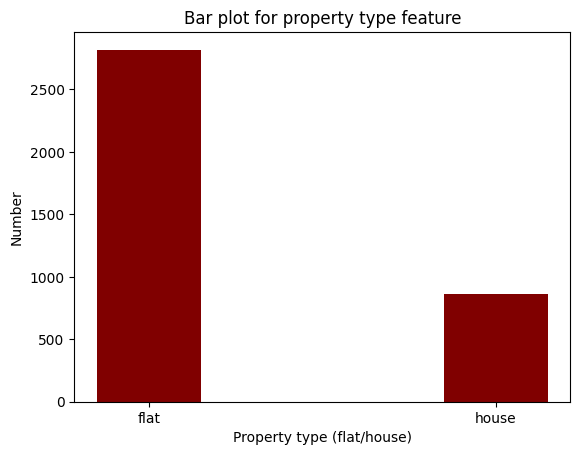

In [ ]:
# Count the occurrences of each property type
property_counts = df['property_type'].value_counts()

# Extract property types and their counts
property_types = property_counts.index
counts = property_counts.values

# Create the bar plot
plt.bar(property_types, counts, color='maroon', width=0.3)
plt.xlabel("Property type (flat/house)")
plt.ylabel("Number")
plt.title("Bar plot for property type feature")
plt.show()

3(iv) Remove societies with less flats using FREQUENCY BINS

                                    society  frequency
0                               independent        486
1                              tulip violet         75
2                               ss the leaf         73
3                      dlf new town heights         42
4      shapoorji pallonji joyville gurugram         42
..                                      ...        ...
671                  dlf gardencity enclave          1
672                             nitin vihar          1
673                  landmark the residency          1
674                          kw royal court          1
675  surendra homes dayaindependentd colony          1

[676 rows x 2 columns]
                                  society  frequency
0                             independent        486
1                            tulip violet         75
2                             ss the leaf         73
3                    dlf new town heights         42
4    shapoorji pallonji joyville gurugram         4

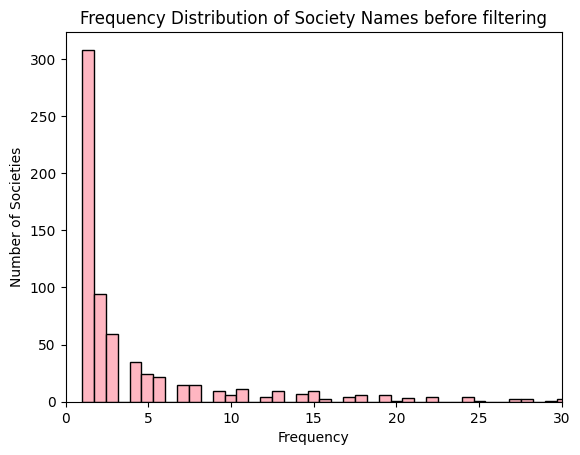

In [ ]:
#using frequency bins, remove the societies with less flats/homes (total 676 societies)
#1. count the frequency of each society name
frequency_count = pd.Series(df['society']).value_counts()
#2. decide the number of bins
num_bins = 676
#3. frequency data into the bins
frequency_bins = pd.cut(frequency_count, bins = num_bins)

# Getting society names along with frequencies
society_frequencies = pd.DataFrame({'society': frequency_count.index, 'frequency': frequency_count.values})
print(society_frequencies)

# Drop the societies that have less frequency count
filtered_societies = society_frequencies[society_frequencies['frequency'] > 6.74] #only selecting societies with >=7 flats/houses
print(filtered_societies)

#plotting
plt.hist(frequency_count, bins=num_bins, color='lightpink', edgecolor='black')
plt.xlabel('Frequency')
plt.ylabel('Number of Societies')
plt.xlim(0, 30)
plt.title('Frequency Distribution of Society Names before filtering')
plt.show()

Column:2611, Rows: 23
property_type             0
society                   0
sector                    0
price                    14
price_per_sqft           14
area                     14
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 14
facing                  617
agePossession             0
super_built_up_area    1166
built_up_area          1396
carpet_area            1335
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64


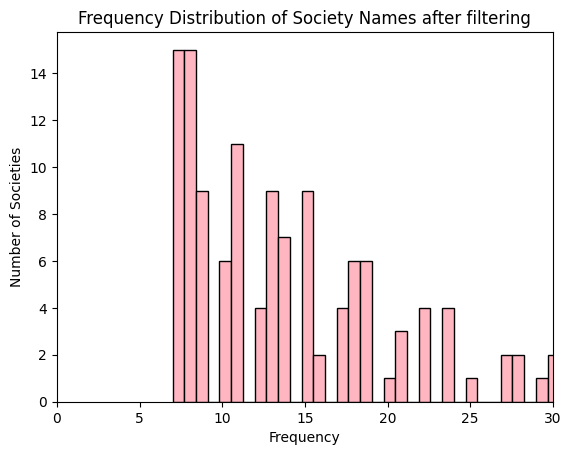

In [ ]:
#drop the societies that have less frequency count
filtered_society_names = filtered_societies['society']
filtered_df = df[df['society'].isin(filtered_society_names)]
[columns, rows] = filtered_df.shape
print(f"Column:{columns}, Rows: {rows}")
#filtered_df is the main dataframe that has flats/houses > 7
print(filtered_df.isnull().sum())

filtered = pd.Series(filtered_df['society']).value_counts()
plt.hist(filtered, bins=num_bins, color='lightpink', edgecolor='black')
plt.xlabel('Frequency')
plt.ylabel('Number of Societies')
plt.xlim(0, 30)
plt.title('Frequency Distribution of Society Names after filtering')
plt.show()

3(v) price column - check missing values, descriptive statistics, plot histogram, box plot for outliers, check skewness and kurtosis to justify outliers (price binning)<br>
3(vi) same as above for price_per_sqft

In [ ]:
# Check for missing values in 'price' column
print(f"Missing values in price column are: {filtered_df['price'].isnull().sum()}" )
# Check for missing values in 'price_per_sqft' column
print(f"Missing values in price_per_sqft column are: {filtered_df['price_per_sqft'].isnull().sum()}")

Missing values in price column are: 14
Missing values in price_per_sqft column are: 14


In [ ]:
#Descriptive statistics
#measure of central tendency (mean, median, mode)
#remove all the missing values in the price column.
print("FOR PRICE: ")
remove_missing_price = filtered_df['price'].dropna()
#MEAN
mean = remove_missing_price.mean()
print('Mean:', mean)
#MEDIAN
median = remove_missing_price.median()
print('Median:', median)
#MODE
mode = remove_missing_price.mode()
print('Mode:', mode)
#---------------------------------------------------------------------------------------------
#measure of dispersion (range, variance, standard deviation)
#RANGE
range = remove_missing_price.max() - remove_missing_price.min()
print('Range:', range)
#VARIANCE
variance = remove_missing_price.var()
print('Variance:', variance)
#STANDARD DEVIATION
standard_deviation = remove_missing_price.std()
print('Standard deviation:', standard_deviation)
#---------------------------------------------------------------------------------------------
#measure of distribution shape (skewness, kurtosis)
from scipy.stats import skew, kurtosis
#SKEWNESS
skewness = skew(remove_missing_price.dropna())
#KURTOSIS
kurtosis = kurtosis(remove_missing_price.dropna())
# Print the skewness and kurtosis
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

FOR PRICE: 
Mean: 2.5669118213323063
Median: 1.6
Mode: 0    1.25
Name: price, dtype: float64
Range: 27.43
Variance: 8.891552863176845
Standard deviation: 2.981870698601273
Skewness: 3.2639399922119123
Kurtosis: 13.856182107338988


In [ ]:
#Descriptive statistics
#measure of central tendency (mean, median, mode)
#remove all the missing values in the price_per_sqft column.
print("FOR PRICE PER SQFT:")
remove_missing_ppsqft = filtered_df['price_per_sqft'].dropna()
#MEAN
mean = remove_missing_ppsqft.mean()
print('Mean:', mean)
#MEDIAN
median = remove_missing_ppsqft.median()
print('Median:', median)
#MODE
mode = remove_missing_ppsqft.mode()
print('Mode:', mode)
#---------------------------------------------------------------------------------------------
#measure of dispersion (range, variance, standard deviation)
#RANGE
range = remove_missing_ppsqft.max() - remove_missing_ppsqft.min()
print('Range:', range)
#VARIANCE
variance = remove_missing_ppsqft.var()
print('Variance:', variance)
#STANDARD DEVIATION
standard_deviation = remove_missing_ppsqft.std()
print('Standard deviation:', standard_deviation)
#---------------------------------------------------------------------------------------------
#measure of distribution shape (skewness, kurtosis)
from scipy.stats import skew, kurtosis
#SKEWNESS
skewness = skew(remove_missing_ppsqft.dropna())
#KURTOSIS
kurtosis = kurtosis(remove_missing_ppsqft.dropna())
# Print the skewness and kurtosis
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

FOR PRICE PER SQFT:
Mean: 13751.427416249519
Median: 9074.0
Mode: 0    10000.0
Name: price_per_sqft, dtype: float64
Range: 399996.0
Variance: 419670607.9590015
Standard deviation: 20485.86361272088
Skewness: 9.86668930687485
Kurtosis: 127.60606472989085


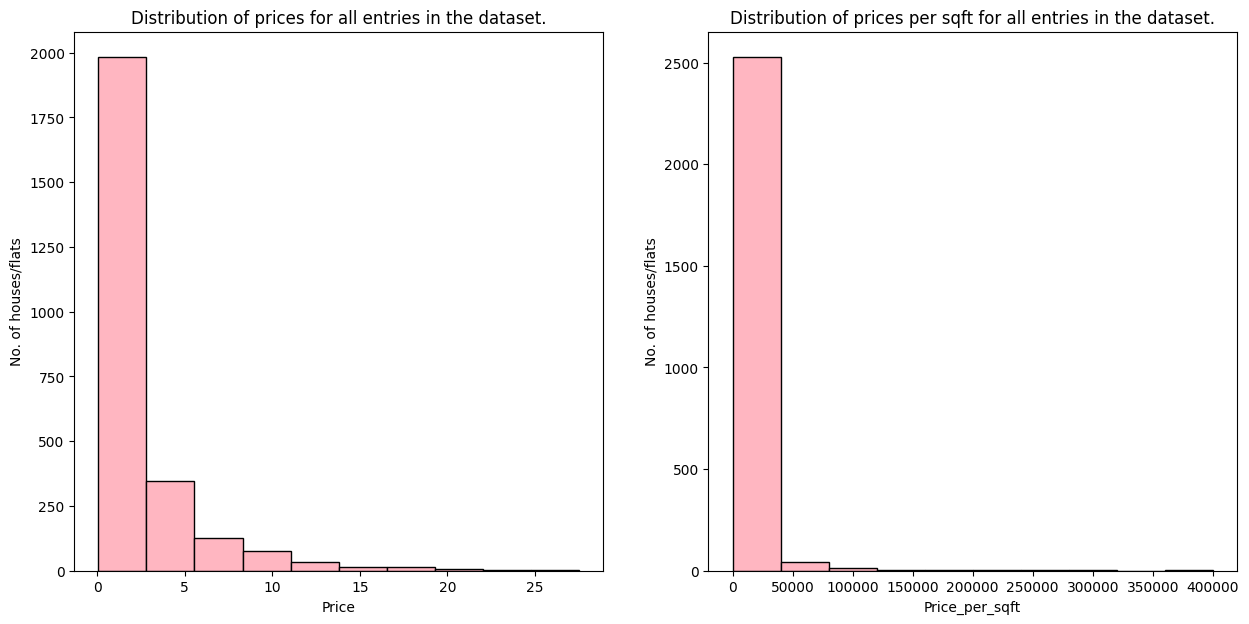

In [ ]:
#plotting histogram y-axis: all the entries, x-axis: price of the houses
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
axs[0].hist(filtered_df['price'], color='lightpink', edgecolor='black')
axs[0].set_title("Distribution of prices for all entries in the dataset.")
axs[0].set_xlabel('Price')
axs[0].set_ylabel('No. of houses/flats')

#plotting histogram y-axis: all the entries, x-axis: price per sqft of the houses
axs[1].hist(filtered_df['price_per_sqft'], color='lightpink', edgecolor='black')
axs[1].set_title("Distribution of prices per sqft for all entries in the dataset.")
axs[1].set_xlabel('Price_per_sqft')
axs[1].set_ylabel('No. of houses/flats')
plt.show()

The following graph detects that the data is right-skewed. The distribution is positively skewed, and most of the outliers are present on the right side of the distribution.<br>
Kurtosis measures peakedness of the distribution and the heaviness of its tail. Distributions with a large kurtosis have more tail data than normally distributed data. Large kurtosis means that the distribution has heavier tails and a sharper peak compared to a normal distribution. It indicates that there are more extreme values (outliers) in the dataset, resulting in a more peaked distribution with thicker tails.<br><br>
When a distribution has large kurtosis:<br>

1. The central peak of the distribution is taller and narrower compared to a normal distribution.<br>
2. The tails of the distribution are heavier, meaning there are more extreme values in the dataset.<br>
3. The distribution has a higher probability of extreme events occurring compared to a normal distribution.<br>
OUR DISTRIBUTION HAS KURTOSIS > 3<br>
Kurtosis > 3: The distribution has heavier tails and a sharper peak compared to a normal distribution. It is called leptokurtic.

Text(0.5, 1.0, 'Detecting outliers in price_per_sqft using boxplot')

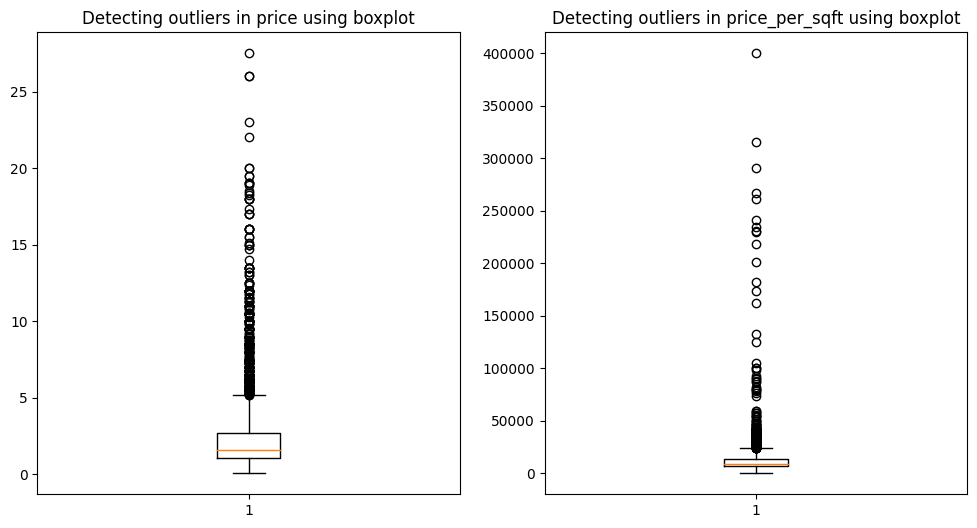

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
#box plot for price
axs[0].boxplot(remove_missing_price)
axs[0].set_title("Detecting outliers in price using boxplot")

#box plot for price_per_sqft
axs[1].boxplot(remove_missing_ppsqft)
axs[1].set_title("Detecting outliers in price_per_sqft using boxplot")

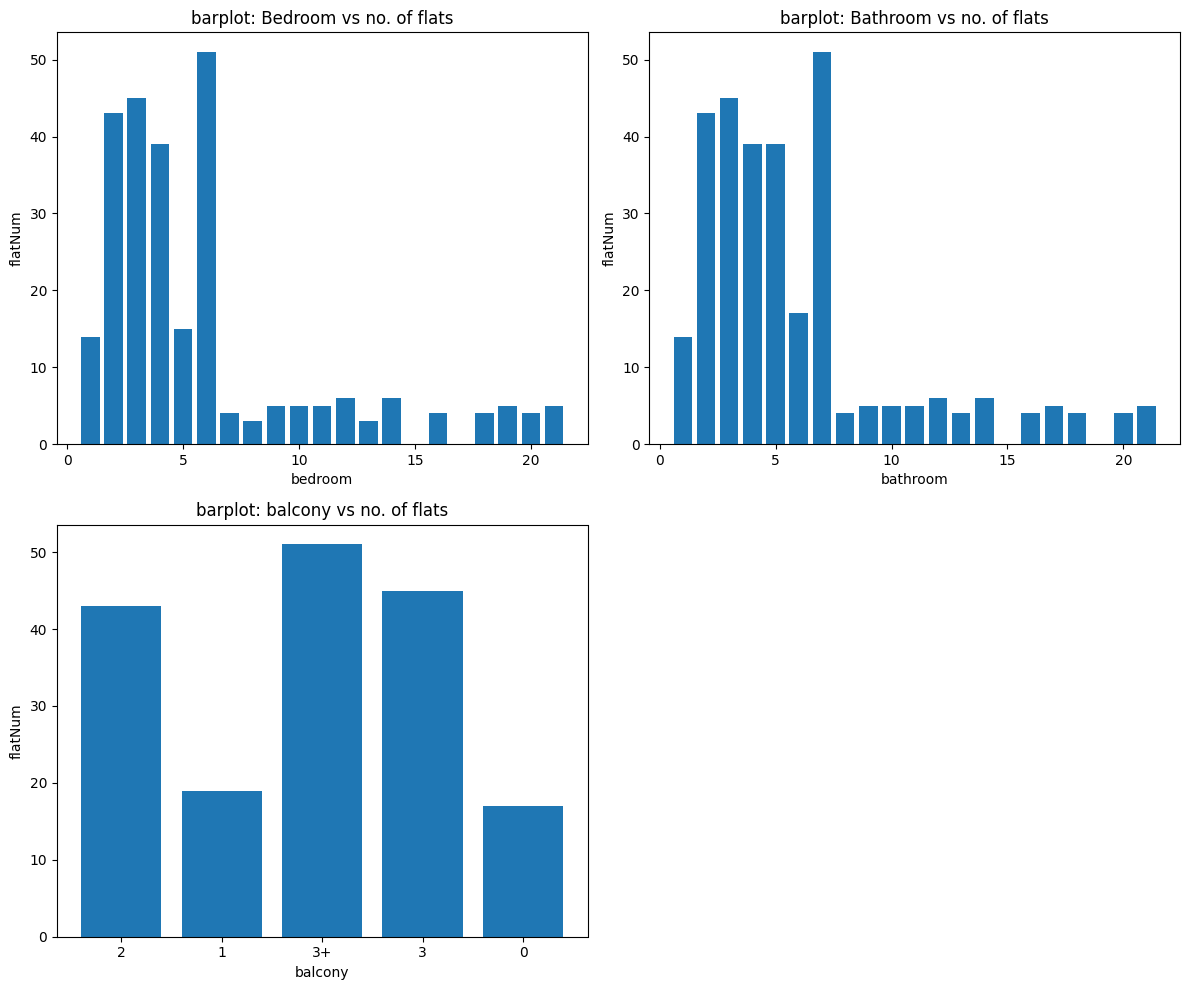

In [ ]:
#bar plot
fig, axs = plt.subplots(2, 2, figsize = (12, 10))
axs[0, 0].bar(filtered_df['bedRoom'], filtered_df['floorNum'])
axs[0, 0].set_title("barplot: Bedroom vs no. of flats")
axs[0, 0].set_xlabel('bedroom')
axs[0, 0].set_ylabel('flatNum')

axs[0, 1].bar(filtered_df['bathroom'], filtered_df['floorNum'])
axs[0, 1].set_title("barplot: Bathroom vs no. of flats")
axs[0, 1].set_xlabel('bathroom')
axs[0, 1].set_ylabel('flatNum')

axs[1, 0].bar(filtered_df['balcony'], filtered_df['floorNum'])
axs[1, 0].set_title("barplot: balcony vs no. of flats")
axs[1, 0].set_xlabel('balcony')
axs[1, 0].set_ylabel('flatNum')

fig.delaxes(axs[1, 1])

plt.tight_layout()
plt.show()

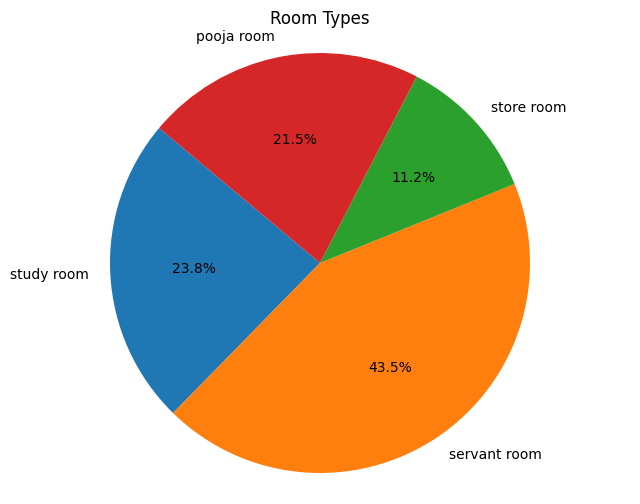

In [ ]:
#pie chart
# Calculate the count of each room type
room_counts = filtered_df[['study room', 'servant room', 'store room', 'pooja room']].sum()
# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(room_counts, labels=room_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Room Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

4 Multivariate analysis<br>
4(i)histogram and boxplots between all columns and target column

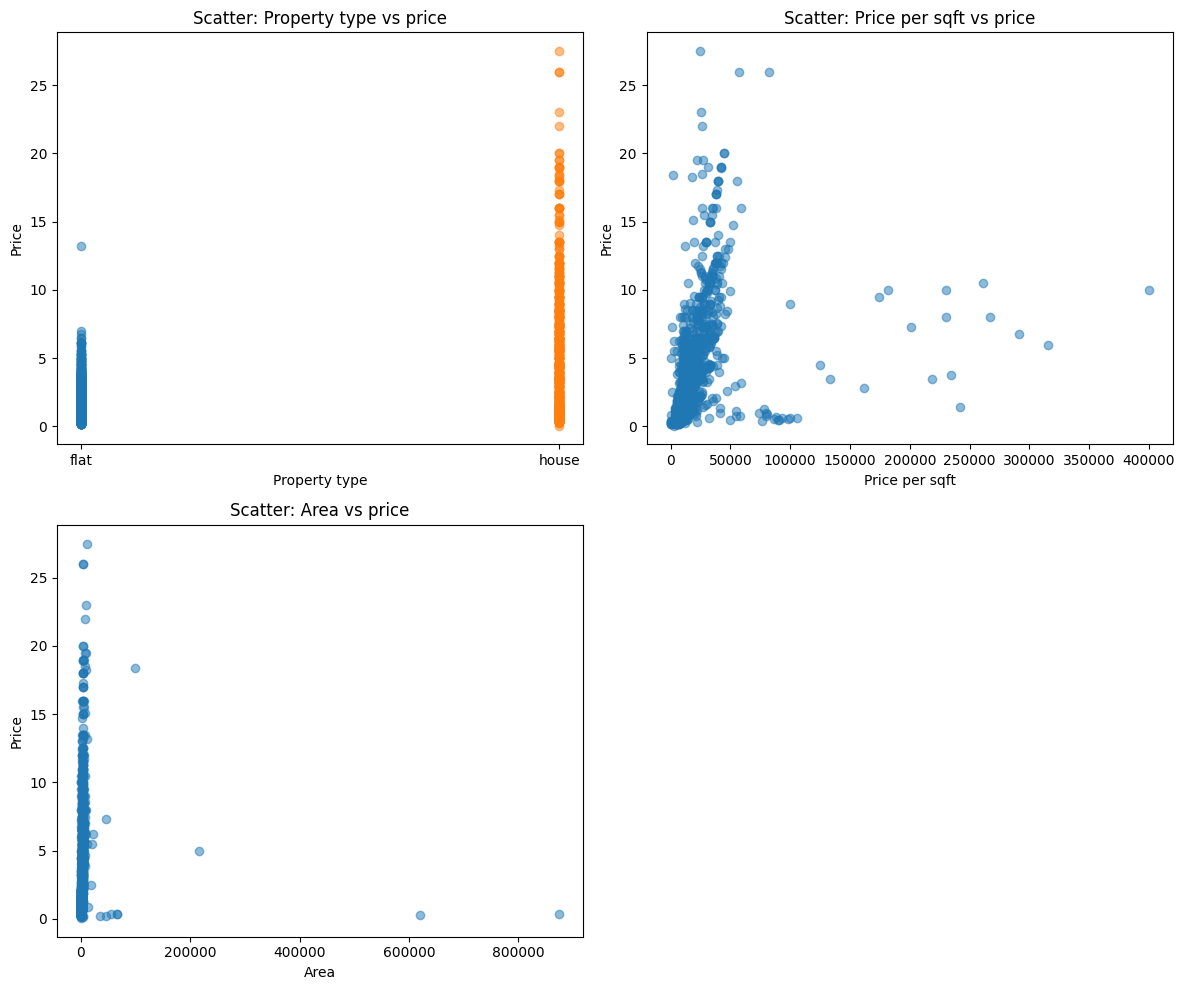

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot scatter: Property type vs price
flat_data = filtered_df[filtered_df['property_type'] == 'flat']['price']
house_data = filtered_df[filtered_df['property_type'] == 'house']['price']
axs[0, 0].scatter(['flat'] * len(flat_data), flat_data, label='Flat', alpha=0.5)
axs[0, 0].scatter(['house'] * len(house_data), house_data, label='House', alpha=0.5)
axs[0, 0].set_title("Scatter: Property type vs price")
axs[0, 0].set_xlabel('Property type')
axs[0, 0].set_ylabel('Price')
plt.legend()

# Plot histogram: Price per sqft vs price
axs[0, 1].scatter(filtered_df['price_per_sqft'], filtered_df['price'], alpha=0.5)
axs[0, 1].set_title("Scatter: Price per sqft vs price")
axs[0, 1].set_xlabel('Price per sqft')
axs[0, 1].set_ylabel('Price')

# Plot histogram: Area vs price
axs[1, 0].scatter(filtered_df['area'], filtered_df['price'], alpha=0.5)
axs[1, 0].set_title("Scatter: Area vs price")
axs[1, 0].set_xlabel('Area')
axs[1, 0].set_ylabel('Price')

# Remove empty subplot
fig.delaxes(axs[1, 1])

plt.tight_layout()
plt.show()

5 Check for missing values and determine their distribution across features

Number of missing values in each column:
property_type             0
society                   0
sector                    0
price                    14
price_per_sqft           14
area                     14
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 14
facing                  617
agePossession             0
super_built_up_area    1166
built_up_area          1396
carpet_area            1335
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64


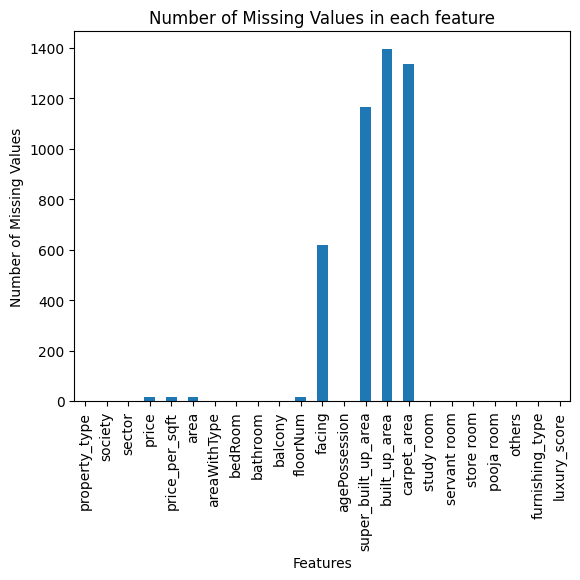

In [ ]:
# Find the number of missing values in each column
missing_values_per_column = filtered_df.isnull().sum()
print("Number of missing values in each column:")
print(missing_values_per_column)

# Plot the number of missing values for each feature
missing_values_per_column.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
plt.title('Number of Missing Values in each feature')
plt.show()

# TASK 2 MISSING VALUES HANDLING
1 choose strategies to handle missing values (based on characterstics and nature of missingness)<br>
[https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/](https://)<br>
IMPUTING OR DELETING<br>

In [ ]:
#Predicting built_up and carpet_area
#finding ratio between super_built_up_area, built_up_area and carpet_area
#identify rows with all filled values
valid_rows = filtered_df.dropna(subset=['super_built_up_area', 'built_up_area', 'carpet_area'])

#ratios
ratio1 = filtered_df['built_up_area']/filtered_df['super_built_up_area']
ratio2 = filtered_df['carpet_area']/filtered_df['built_up_area']

#predicting
filtered_df.loc[filtered_df['super_built_up_area'].notna() & filtered_df['built_up_area'].isna(), 'built_up_area'] = filtered_df['super_built_up_area'] * ratio1.mean()
#in built_up_area column, super_built_up_area is not null and built_up_area is null ^
filtered_df.loc[filtered_df['carpet_area'].notna() & filtered_df['built_up_area'].isna(), 'built_up_area'] = filtered_df['carpet_area'] / ratio2.mean()
filtered_df.loc[filtered_df['built_up_area'].notna() & filtered_df['carpet_area'].isna(), 'carpet_area'] = filtered_df['built_up_area'] * ratio2.mean()


print(filtered_df)

     property_type                              society      sector  price  \
1             flat                     smart world gems   sector 89   0.95   
3             flat               breez global hill view  sohna road   0.32   
4             flat          bestech park view sanskruti   sector 92   1.60   
7             flat               experion the heartsong  sector 108   2.00   
8             flat              adani m2k oyster grande  sector 102   1.90   
...            ...                                  ...         ...    ...   
3795          flat                      eldeco accolade  sohna road   0.87   
3796          flat                           paras dews  sector 106   0.92   
3798          flat                       pivotal devaan   sector 84   0.37   
3799         house  international city by sobha phase 1  sector 109   6.00   
3801         house                          independent   sector 43  15.50   

      price_per_sqft    area  \
1             8600.0  1105.0   

In [ ]:
#drop super_built_up_area column
filtered_df = filtered_df.drop(['super_built_up_area'], axis=1)
filtered_df.shape

(2611, 22)

Filling the missing values in facing column<br>
plotting a heatmap for facing and agePossession to find a trend.

Missing values in the 'facing' column: 617


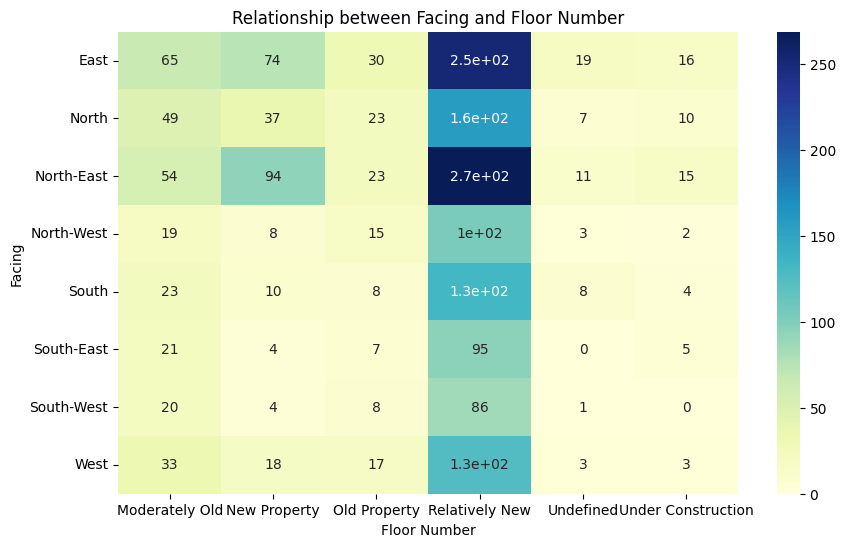

In [ ]:
# Check for missing values in the 'facing' column
missing_values_facing = filtered_df['facing'].isnull().sum()
print("Missing values in the 'facing' column:", missing_values_facing)

# Plot a heatmap to visualize the relationship between 'facing' and 'agePossession'
contingency_table = pd.crosstab(filtered_df['facing'], filtered_df['agePossession'])
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu")
plt.title("Relationship between Facing and Floor Number")
plt.xlabel("Floor Number")
plt.ylabel("Facing")
plt.show()

we observe that flats/houses under<br>
‘Moderately Old’, ‘Old Property’, ‘Undefined', ‘Under Construction’ - East<br> ‘New Property’, ‘Relatively New’ - North-East

In [ ]:
# Replace missing values in 'facing' column based on 'agePossession' values - mode imputation
filtered_df['facing'] = np.where(filtered_df['facing'].isna() & filtered_df['agePossession'].isin(['Moderately Old', 'Old Property', 'Undefined', 'Under Construction']), 'east', filtered_df['facing'])
filtered_df['facing'] = np.where(filtered_df['facing'].isna() & filtered_df['agePossession'].isin(['New Property', 'Relatively New']), 'North-East', filtered_df['facing'])

# Print the new DataFrame
print(filtered_df['facing'], filtered_df['agePossession'])


1       North-East
3       North-East
4       North-West
7             East
8       North-East
           ...    
3795    North-East
3796          East
3798    North-West
3799    South-West
3801          East
Name: facing, Length: 2611, dtype: object 1         New Property
3         New Property
4       Relatively New
7       Relatively New
8       Relatively New
             ...      
3795    Relatively New
3796    Relatively New
3798    Relatively New
3799    Relatively New
3801    Moderately Old
Name: agePossession, Length: 2611, dtype: object


In [ ]:
#identifying missing floorNum - Imputing with median
from sklearn.impute import SimpleImputer
missing_floorNum = filtered_df['floorNum'].isnull()
imputer = SimpleImputer(strategy='median')
filtered_df['floorNum'] = imputer.fit_transform(filtered_df['floorNum'].values.reshape(-1, 1))
print(filtered_df['floorNum'])

1        4.0
3       17.0
4       10.0
7       14.0
8        8.0
        ... 
3795    10.0
3796     2.0
3798     5.0
3799     2.0
3801     3.0
Name: floorNum, Length: 2611, dtype: float64


In [ ]:
from sklearn.impute import KNNImputer

# Define the columns for imputation
cols = ['luxury_score', 'bedRoom', 'bathroom', 'floorNum', 'study room', 'servant room', 'pooja room', 'others', 'furnishing_type']
# KNNImputer instance
imputer = KNNImputer(n_neighbors=2)
# Impute missing values for 'price'
filtered_df['price'] = imputer.fit_transform(filtered_df[cols + ['price']])[:, -1]
# Impute missing values for 'price_per_sqft'
filtered_df['price_per_sqft'] = imputer.fit_transform(filtered_df[cols + ['price_per_sqft']])[:, -1]
# Impute missing values for 'area'
filtered_df['area'] = imputer.fit_transform(filtered_df[cols + ['area']])[:, -1]

print(filtered_df['price'], filtered_df['price_per_sqft'], filtered_df['area'])

1        0.95
3        0.32
4        1.60
7        2.00
8        1.90
        ...  
3795     0.87
3796     0.92
3798     0.37
3799     6.00
3801    15.50
Name: price, Length: 2611, dtype: float64 1        8600.0
3        5470.0
4        8020.0
7        8554.0
8        9105.0
         ...   
3795     5965.0
3796     6642.0
3798     6346.0
3799     9634.0
3801    28233.0
Name: price_per_sqft, Length: 2611, dtype: float64 1       1105.0
3        585.0
4       1995.0
7       2338.0
8       2087.0
         ...  
3795    1459.0
3796    1385.0
3798     583.0
3799    6228.0
3801    5490.0
Name: area, Length: 2611, dtype: float64


In [ ]:
print(filtered_df.isnull().sum())

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
area               0
areaWithType       0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
facing             0
agePossession      0
built_up_area      0
carpet_area        0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64


# TASK 3 OUTLIER DETECTION
1 Use z-score/ IQR to detect outliers in all numeric features of the dataset<br>
after the missing values are handled, make box plots and IQR for outliers in price, price_per_sqft, area, built_up_area, carpet_area

Outliers:
 19       5.50
25       9.00
26       7.00
29       5.65
38       7.65
        ...  
3777     9.50
3791     6.44
3794     8.00
3799     6.00
3801    15.50
Name: price, Length: 299, dtype: float64
Total number of outliers: 299


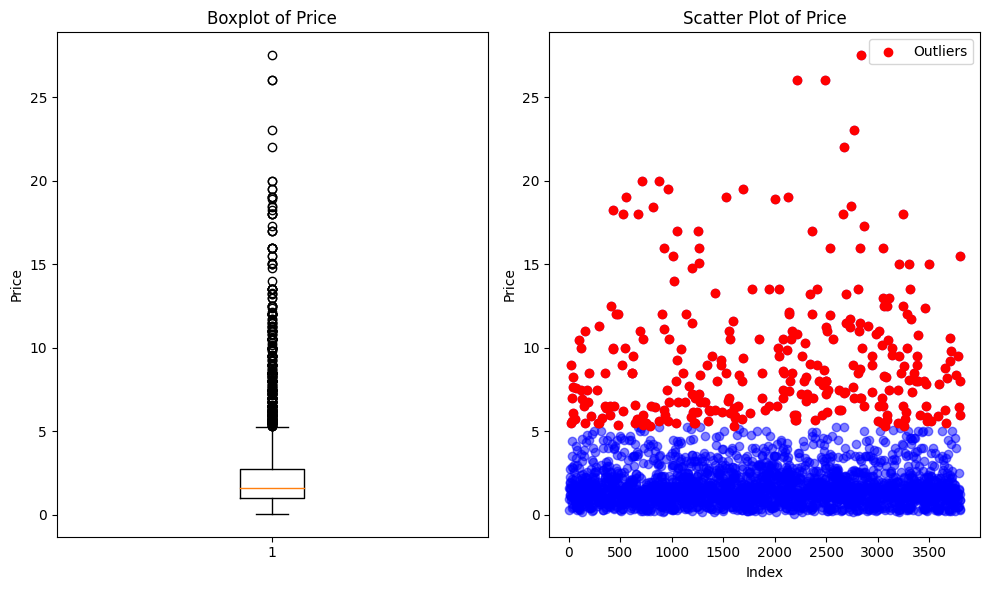

In [ ]:
#we use the method of IQR
from scipy import stats
#price
# Calculate the interquartile range
IQR = stats.iqr(filtered_df['price'])
# Calculate the lower and upper bounds
Q1 = np.percentile(filtered_df['price'], 25)
Q3 = np.percentile(filtered_df['price'], 75)
lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)
outliers = filtered_df[(filtered_df['price'] < lower) | (filtered_df['price'] > upper)]['price']
print('Outliers:\n', outliers)
total_outliers = len(outliers)
print('Total number of outliers:', total_outliers)

# Box plot
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(filtered_df['price'])
plt.title("Boxplot of Price")
plt.ylabel("Price")

# Scatter plot
plt.subplot(1, 2, 2)
plt.scatter(filtered_df.index, filtered_df['price'], color='blue', alpha=0.5)
plt.scatter(outliers.index, outliers, color='red', label='Outliers')
plt.title("Scatter Plot of Price")
plt.xlabel("Index")
plt.ylabel("Price")
plt.legend()

plt.tight_layout()
plt.show()

Outliers:
 19      38194.0
25      27778.0
26      28283.0
39      38194.0
40      25103.0
         ...   
3762    25926.0
3774    90000.0
3791    26502.0
3794    26298.0
3801    28233.0
Name: price_per_sqft, Length: 266, dtype: float64
Total number of outliers: 266


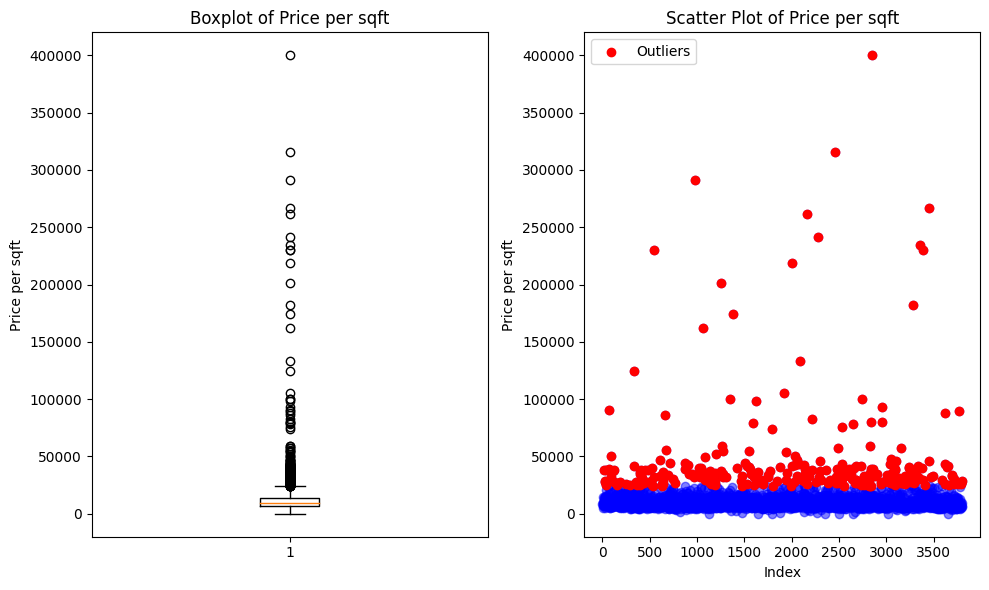

In [ ]:
#price_per_sqft
# Calculate the interquartile range
IQR = stats.iqr(filtered_df['price_per_sqft'])
# Calculate the lower and upper bounds
Q1 = np.percentile(filtered_df['price_per_sqft'], 25)
Q3 = np.percentile(filtered_df['price_per_sqft'], 75)
lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)
outliers = filtered_df[(filtered_df['price_per_sqft'] < lower) | (filtered_df['price_per_sqft'] > upper)]['price_per_sqft']
print('Outliers:\n', outliers)
total_outliers = len(outliers)
print('Total number of outliers:', total_outliers)

# Box plot
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(filtered_df['price_per_sqft'])
plt.title("Boxplot of Price per sqft")
plt.ylabel("Price per sqft")

# Scatter plot
plt.subplot(1, 2, 2)
plt.scatter(filtered_df.index, filtered_df['price_per_sqft'], color='blue', alpha=0.5)
plt.scatter(outliers.index, outliers, color='red', label='Outliers')
plt.title("Scatter Plot of Price per sqft")
plt.xlabel("Index")
plt.ylabel("Price per sqft")
plt.legend()

plt.tight_layout()
plt.show()

Outliers:
 29       5400.0
78       7500.0
130      4550.0
142      5400.0
156      4125.0
         ...   
3647     9001.0
3649    45283.0
3777     4050.0
3799     6228.0
3801     5490.0
Name: area, Length: 145, dtype: float64
Total number of outliers: 145


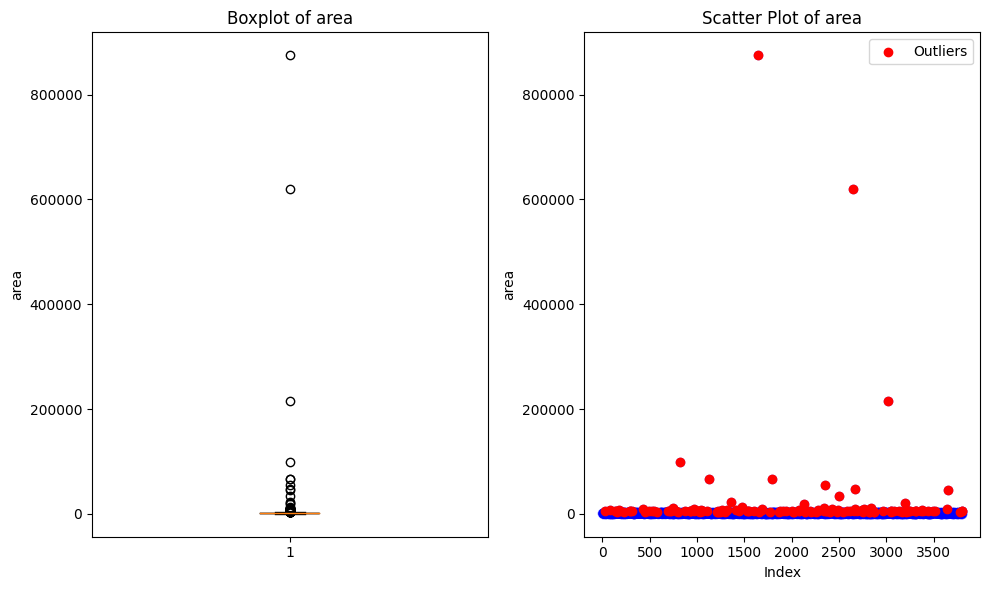

In [ ]:
#area
# Calculate the interquartile range
IQR = stats.iqr(filtered_df['area'])
# Calculate the lower and upper bounds
Q1 = np.percentile(filtered_df['area'], 25)
Q3 = np.percentile(filtered_df['area'], 75)
lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)
outliers = filtered_df[(filtered_df['area'] < lower) | (filtered_df['area'] > upper)]['area']
print('Outliers:\n', outliers)
total_outliers = len(outliers)
print('Total number of outliers:', total_outliers)

# Box plot
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(filtered_df['area'])
plt.title("Boxplot of area")
plt.ylabel("area")

# Scatter plot
plt.subplot(1, 2, 2)
plt.scatter(filtered_df.index, filtered_df['area'], color='blue', alpha=0.5)
plt.scatter(outliers.index, outliers, color='red', label='Outliers')
plt.title("Scatter Plot of area")
plt.xlabel("Index")
plt.ylabel("area")
plt.legend()

plt.tight_layout()
plt.show()

Outliers:
 29       5400.000000
78       7500.000000
114      9500.000000
130      4630.000000
142      5400.000000
            ...     
3647     9000.000000
3649    53134.549819
3659     3865.507867
3799     6228.000000
3801     5490.000000
Name: built_up_area, Length: 157, dtype: float64
Total number of outliers: 157


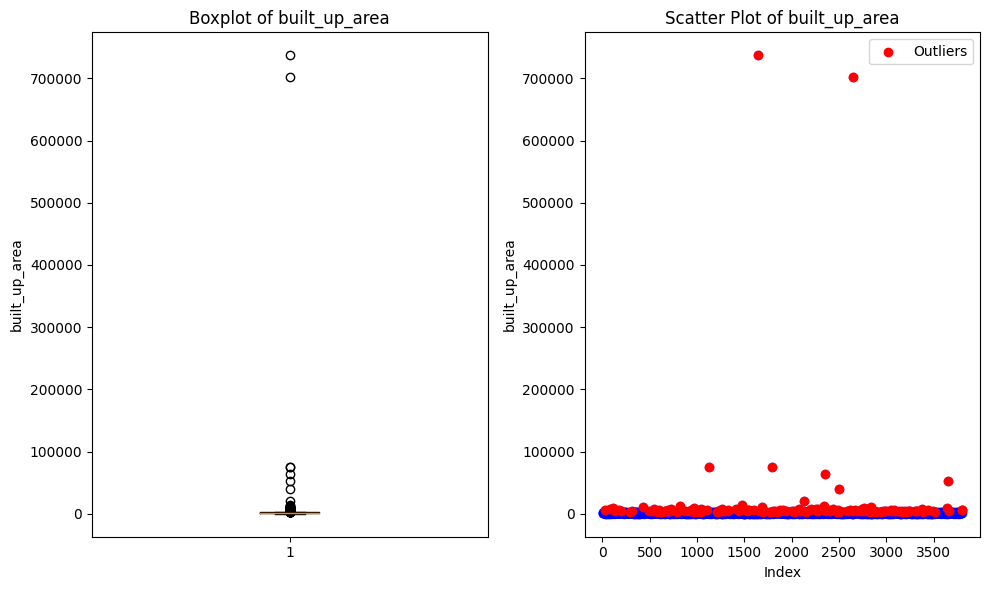

In [ ]:
#built_up_area
# Calculate the interquartile range
IQR = stats.iqr(filtered_df['built_up_area'])
# Calculate the lower and upper bounds
Q1 = np.percentile(filtered_df['built_up_area'], 25)
Q3 = np.percentile(filtered_df['built_up_area'], 75)
lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)
outliers = filtered_df[(filtered_df['built_up_area'] < lower) | (filtered_df['built_up_area'] > upper)]['built_up_area']
print('Outliers:\n', outliers)
total_outliers = len(outliers)
print('Total number of outliers:', total_outliers)

# Box plot
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(filtered_df['built_up_area'])
plt.title("Boxplot of built_up_area")
plt.ylabel("built_up_area")

# Scatter plot
plt.subplot(1, 2, 2)
plt.scatter(filtered_df.index, filtered_df['built_up_area'], color='blue', alpha=0.5)
plt.scatter(outliers.index, outliers, color='red', label='Outliers')
plt.title("Scatter Plot of built_up_area")
plt.xlabel("Index")
plt.ylabel("built_up_area")
plt.legend()

plt.tight_layout()
plt.show()

Outliers:
 29       4671.468957
78       6488.151329
114      9000.000000
130      4550.000000
142      4671.468957
            ...     
3647     7785.781594
3649    45966.000000
3659     3344.000000
3799     5387.760863
3801     4749.326772
Name: carpet_area, Length: 154, dtype: float64
Total number of outliers: 154


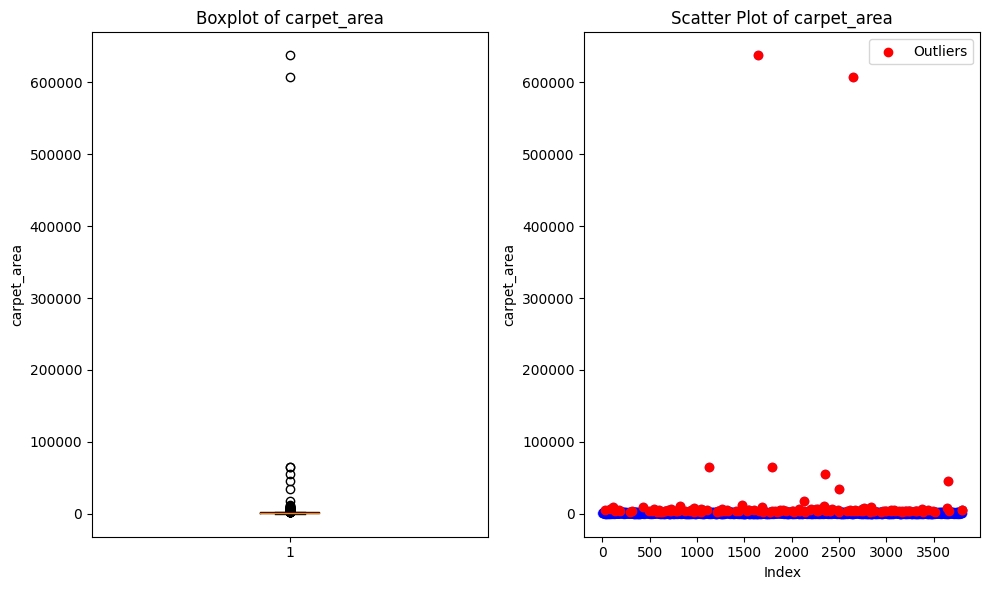

In [ ]:
#carpet_area
# Calculate the interquartile range
IQR = stats.iqr(filtered_df['carpet_area'])
# Calculate the lower and upper bounds
Q1 = np.percentile(filtered_df['carpet_area'], 25)
Q3 = np.percentile(filtered_df['carpet_area'], 75)
lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)
outliers = filtered_df[(filtered_df['carpet_area'] < lower) | (filtered_df['carpet_area'] > upper)]['carpet_area']
print('Outliers:\n', outliers)
total_outliers = len(outliers)
print('Total number of outliers:', total_outliers)

# Box plot
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(filtered_df['carpet_area'])
plt.title("Boxplot of carpet_area")
plt.ylabel("carpet_area")

# Scatter plot
plt.subplot(1, 2, 2)
plt.scatter(filtered_df.index, filtered_df['carpet_area'], color='blue', alpha=0.5)
plt.scatter(outliers.index, outliers, color='red', label='Outliers')
plt.title("Scatter Plot of carpet_area")
plt.xlabel("Index")
plt.ylabel("carpet_area")
plt.legend()

plt.tight_layout()
plt.show()

Outliers:
 19      18
25       8
66      12
74       9
78      19
        ..
3618    21
3698    16
3713    10
3777     8
3794     9
Name: bedRoom, Length: 110, dtype: int64
Total number of outliers: 110


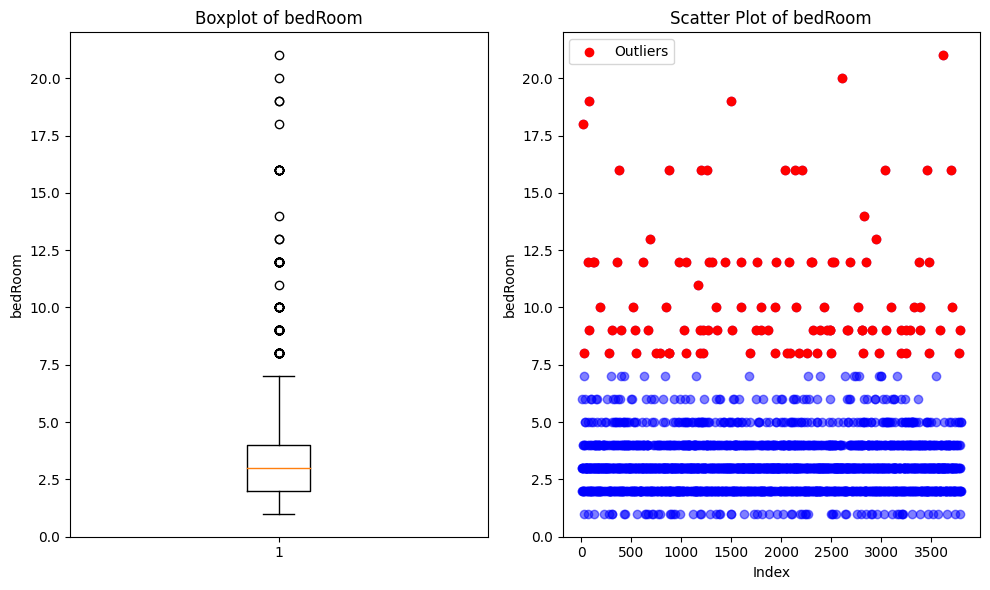

In [ ]:
#bedRoom
# Calculate the interquartile range
IQR = stats.iqr(filtered_df['bedRoom'])
# Calculate the lower and upper bounds
Q1 = np.percentile(filtered_df['bedRoom'], 25)
Q3 = np.percentile(filtered_df['bedRoom'], 75)
lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)
outliers = filtered_df[(filtered_df['bedRoom'] < lower) | (filtered_df['bedRoom'] > upper)]['bedRoom']
print('Outliers:\n', outliers)
total_outliers = len(outliers)
print('Total number of outliers:', total_outliers)

# Box plot
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(filtered_df['bedRoom'])
plt.title("Boxplot of bedRoom")
plt.ylabel("bedRoom")

# Scatter plot
plt.subplot(1, 2, 2)
plt.scatter(filtered_df.index, filtered_df['bedRoom'], color='blue', alpha=0.5)
plt.scatter(outliers.index, outliers, color='red', label='Outliers')
plt.title("Scatter Plot of bedRoom")
plt.xlabel("Index")
plt.ylabel("bedRoom")
plt.legend()

plt.tight_layout()
plt.show()

Outliers:
 19      18
74       9
78      17
119     12
127     12
        ..
3618    21
3698    18
3713     9
3777     8
3794     9
Name: bathroom, Length: 95, dtype: int64
Total number of outliers: 95


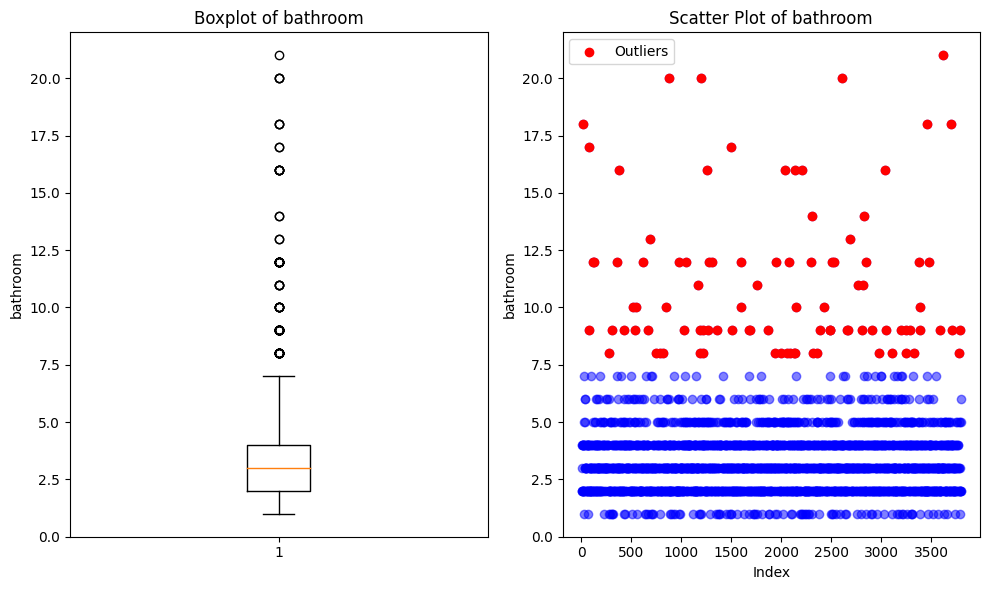

In [ ]:
#bathroom
# Calculate the interquartile range
IQR = stats.iqr(filtered_df['bathroom'])
# Calculate the lower and upper bounds
Q1 = np.percentile(filtered_df['bathroom'], 25)
Q3 = np.percentile(filtered_df['bathroom'], 75)
lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)
outliers = filtered_df[(filtered_df['bathroom'] < lower) | (filtered_df['bathroom'] > upper)]['bathroom']
print('Outliers:\n', outliers)
total_outliers = len(outliers)
print('Total number of outliers:', total_outliers)

# Box plot
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(filtered_df['bathroom'])
plt.title("Boxplot of bathroom")
plt.ylabel("bathroom")

# Scatter plot
plt.subplot(1, 2, 2)
plt.scatter(filtered_df.index, filtered_df['bathroom'], color='blue', alpha=0.5)
plt.scatter(outliers.index, outliers, color='red', label='Outliers')
plt.title("Scatter Plot of bathroom")
plt.xlabel("Index")
plt.ylabel("bathroom")
plt.legend()

plt.tight_layout()
plt.show()

Outliers:
 30      31.0
33      45.0
169     29.0
224     23.0
287     32.0
        ... 
3480    40.0
3532    22.0
3543    23.0
3607    26.0
3775    24.0
Name: floorNum, Length: 77, dtype: float64
Total number of outliers: 77


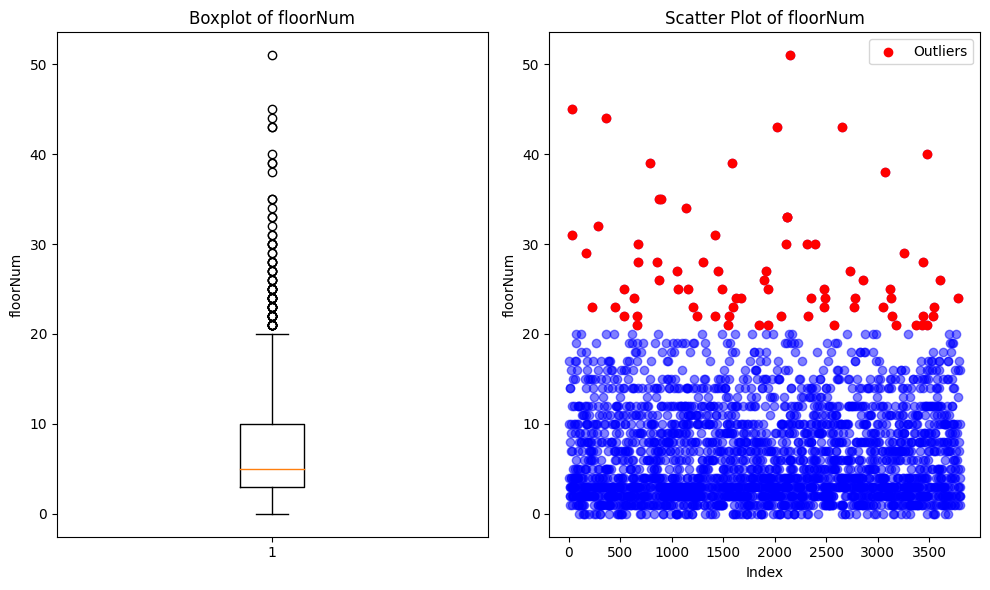

In [ ]:
#floorNum
# Calculate the interquartile range
IQR = stats.iqr(filtered_df['floorNum'])
# Calculate the lower and upper bounds
Q1 = np.percentile(filtered_df['floorNum'], 25)
Q3 = np.percentile(filtered_df['floorNum'], 75)
lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)
outliers = filtered_df[(filtered_df['floorNum'] < lower) | (filtered_df['floorNum'] > upper)]['floorNum']
print('Outliers:\n', outliers)
total_outliers = len(outliers)
print('Total number of outliers:', total_outliers)

# Box plot
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(filtered_df['floorNum'])
plt.title("Boxplot of floorNum")
plt.ylabel("floorNum")

# Scatter plot
plt.subplot(1, 2, 2)
plt.scatter(filtered_df.index, filtered_df['floorNum'], color='blue', alpha=0.5)
plt.scatter(outliers.index, outliers, color='red', label='Outliers')
plt.title("Scatter Plot of floorNum")
plt.xlabel("Index")
plt.ylabel("floorNum")
plt.legend()

plt.tight_layout()
plt.show()

2(ii) Use describe function to show descriptive statistics.

In [ ]:
print(filtered_df.describe())

             price  price_per_sqft           area      bedRoom     bathroom  \
count  2611.000000     2611.000000    2611.000000  2611.000000  2611.000000   
mean      2.590553    13806.002872    2743.071812     3.416699     3.507851   
std       3.003869    20456.590791   21601.901357     1.956875     1.994877   
min       0.070000        4.000000      50.000000     1.000000     1.000000   
25%       1.040000     7021.500000    1298.000000     2.000000     2.000000   
50%       1.600000     9105.000000    1756.000000     3.000000     3.000000   
75%       2.725000    13928.500000    2299.000000     4.000000     4.000000   
max      27.500000   400000.000000  875000.000000    21.000000    21.000000   

          floorNum  built_up_area    carpet_area   study room  servant room  \
count  2611.000000    2611.000000    2611.000000  2611.000000   2611.000000   
mean      7.056300    2454.003516    2116.734379     0.212179      0.387974   
std       6.117456   20091.384493   17381.606925   

# TASK 4 OUTLIER HANDLING
1 decide strategies for handling outliers based on their impact on the analysis, objectives - WINSORIZATION AND TRIMMING

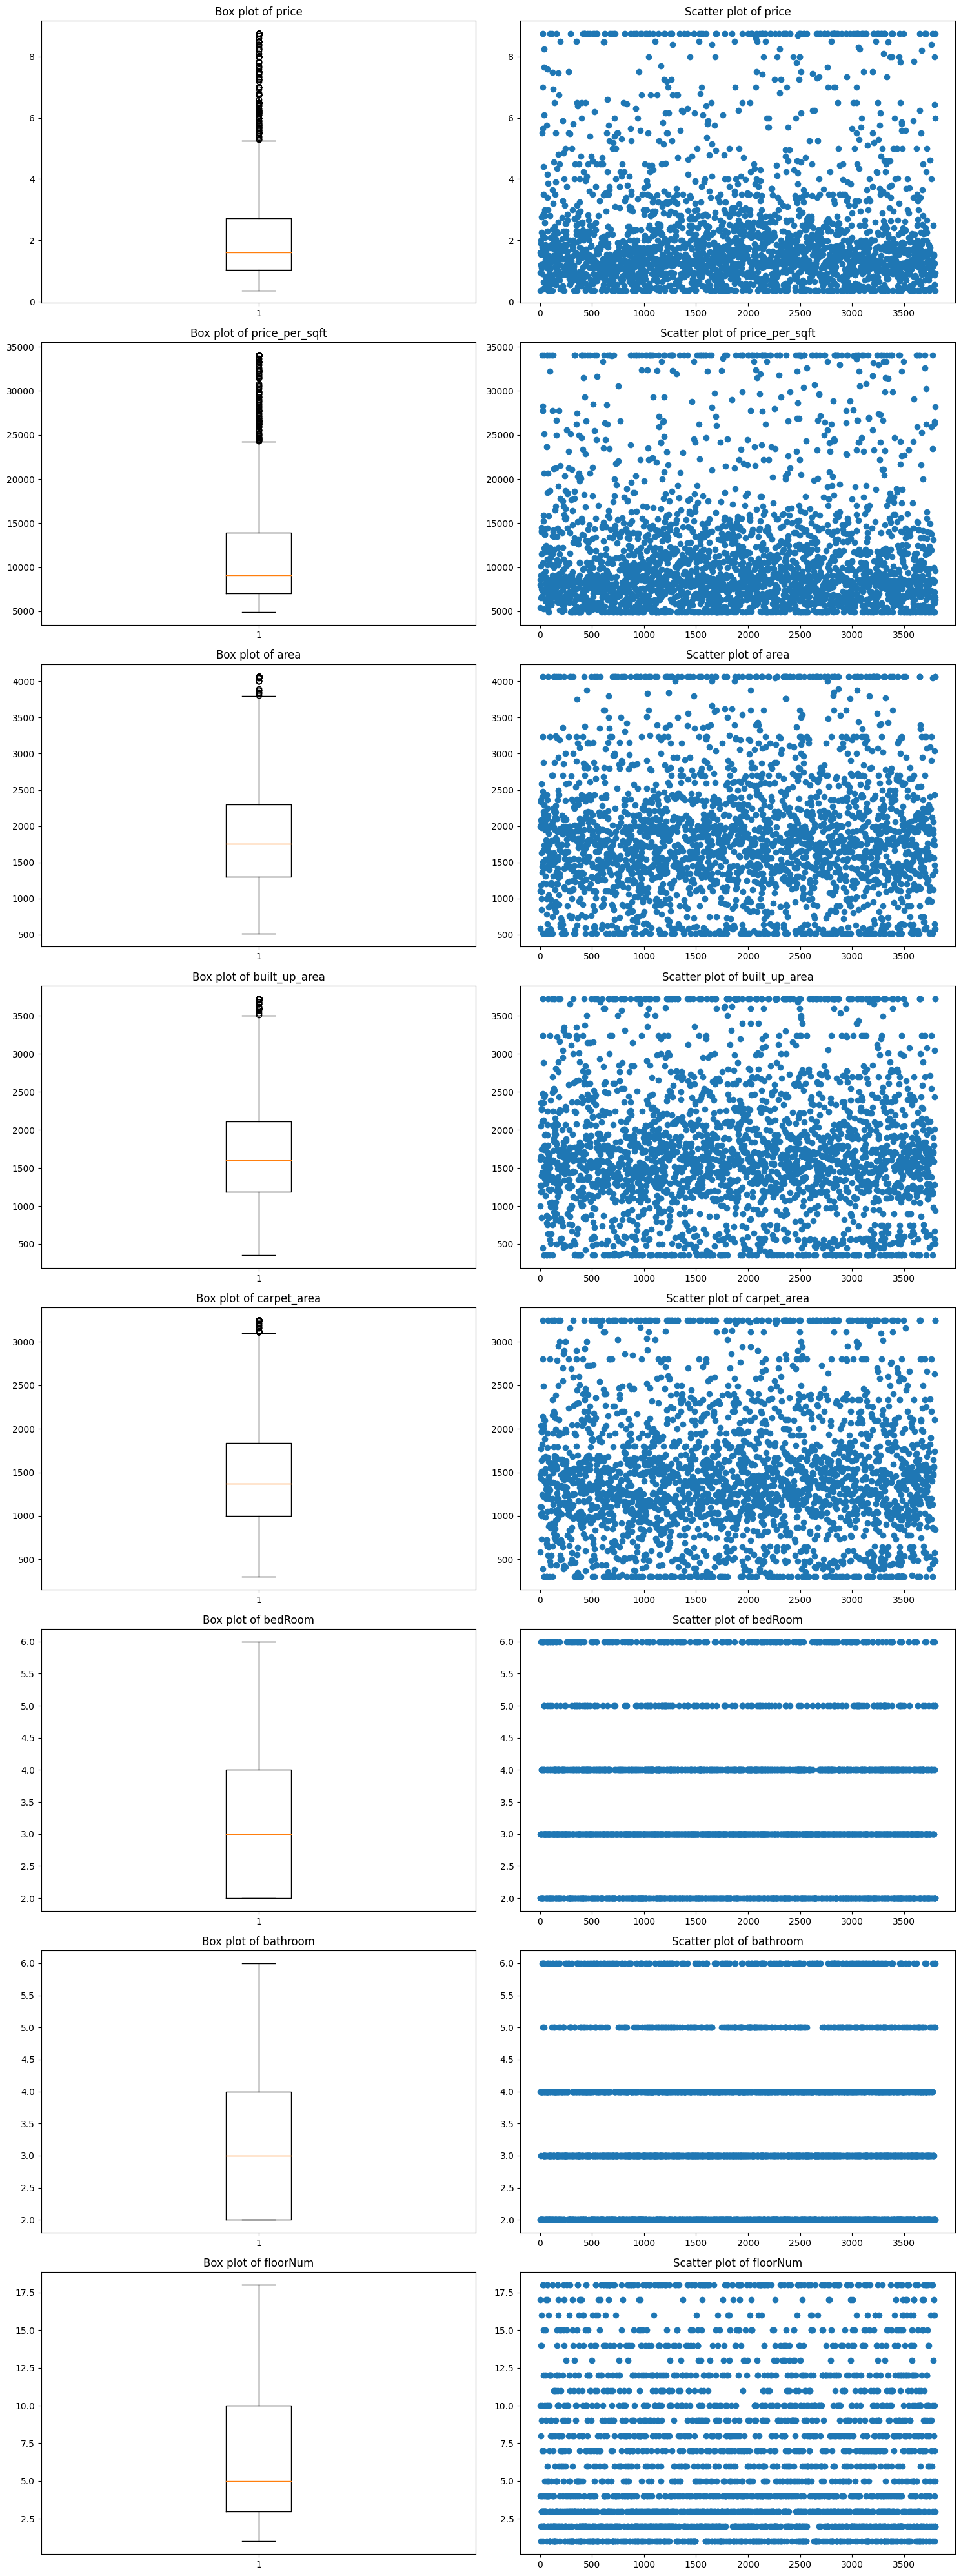

Box plots and scatter plots for the winsorized columns have been generated.


In [ ]:
from scipy.stats.mstats import winsorize

# Winsorizing the specified columns in filtered_df
winsorized_price = winsorize(filtered_df['price'], limits=[0.05, 0.05])
winsorized_price_per_sqft = winsorize(filtered_df['price_per_sqft'], limits=[0.05, 0.05])
winsorized_area = winsorize(filtered_df['area'], limits=[0.05, 0.05])
winsorized_built_up_area = winsorize(filtered_df['built_up_area'], limits=[0.05, 0.05])
winsorized_carpet_area = winsorize(filtered_df['carpet_area'], limits=[0.05, 0.05])
winsorized_bedRoom = winsorize(filtered_df['bedRoom'], limits=[0.05, 0.05])
winsorized_bathroom = winsorize(filtered_df['bathroom'], limits=[0.05, 0.05])
winsorized_floorNum = winsorize(filtered_df['floorNum'], limits=[0.05, 0.05])

# Creating box plots and scatter plots
fig, axs = plt.subplots(8, 2, figsize=(15, 40))

# Box plots
columns = ['price', 'price_per_sqft', 'area', 'built_up_area', 'carpet_area', 'bedRoom', 'bathroom', 'floorNum']
winsorized_data = [winsorized_price, winsorized_price_per_sqft, winsorized_area, winsorized_built_up_area, winsorized_carpet_area, winsorized_bedRoom, winsorized_bathroom, winsorized_floorNum]

for i, col in enumerate(columns):
    axs[i, 0].boxplot(winsorized_data[i])
    axs[i, 0].set_title('Box plot of ' + col)
    axs[i, 1].scatter(filtered_df.index, winsorized_data[i])
    axs[i, 1].set_title('Scatter plot of ' + col)

plt.tight_layout()
plt.show()
print('Box plots and scatter plots for the winsorized columns have been generated.')


Trimming the remaining values

In [ ]:
# Detect and remove rows with outliers
outlier_indices = []

# Define the columns to check for outliers
columns_to_check = ['price', 'price_per_sqft', 'area', 'built_up_area', 'carpet_area', 'bedRoom', 'bathroom', 'floorNum']

# Iterate over each column
for col in columns_to_check:
    # Calculate the interquartile range
    Q1 = np.percentile(filtered_df[col], 25)
    Q3 = np.percentile(filtered_df[col], 75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers and append their indices to the list
    outliers = filtered_df[(filtered_df[col] < lower_bound) | (filtered_df[col] > upper_bound)].index
    outlier_indices.extend(outliers)

# Remove duplicate indices
outlier_indices = list(set(outlier_indices))

# Remove rows with outliers
filtered_df = filtered_df.drop(outlier_indices)

# Reset index
filtered_df = filtered_df.reset_index(drop=True)

print('Rows with outliers removed. Filtered DataFrame updated.')

Rows with outliers removed. Filtered DataFrame updated.


In [ ]:
print(filtered_df.shape)

(2082, 22)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/G_241_211_239_076_CS2202/Report
filtered_df.to_csv('final_data.csv', index=False)

/content/drive/MyDrive/G_241_211_239_076_CS2202/Report
